## Beauty and Skincare- Supply Chain Analysis


## Introduction


In today's competitive beauty and skincare market, an efficient and responsive supply chain is critical to meet customer demands and maintain a strong market position. This notebook focuses on analyzing the supply chain of a fashion and beauty startup, specifically dealing with makeup products. By performing exploratory data analysis (EDA), optimization, and reporting, we aim to uncover valuable insights that can drive decision-making and improve supply chain performance.

The analysis will cover various aspects of the supply chain, including product distribution, pricing, availability, transportation modes, and routes. Additionally, we will calculate optimal order quantities, monitor supply gaps, and highlight key issues such as high defect rates. The ultimate goal is to enhance the overall efficiency, reduce costs, and ensure timely delivery of products to the market.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#Load and display the dataset
df = pd.read_csv('supply_chain_data.csv')
df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## 1. Exploratory Data Analysis (EDA)

Purpose and Importance
Exploratory Data Analysis (EDA) is the first crucial step in understanding the dataset. It involves visualizing and summarizing the data to uncover patterns, trends, and potential issues within the supply chain. EDA helps identify key areas that require attention and improvement, setting the stage for more detailed analysis and optimization.

In [3]:
# Display basic statistical summary of the dataset

df.describe()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [4]:
# Display dataset information, such as data types and non-null counts
print("Dataset Information:")
print(df.info())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistical summary again for quick reference
print("\nBasic Statistical Summary:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Locati

## Distribution of Product Types:

 Understanding the distribution of different product types in the dataset provides insights into the company's product portfolio. It helps in identifying which products are more prevalent and could inform decisions on inventory management, marketing strategies, and product development.

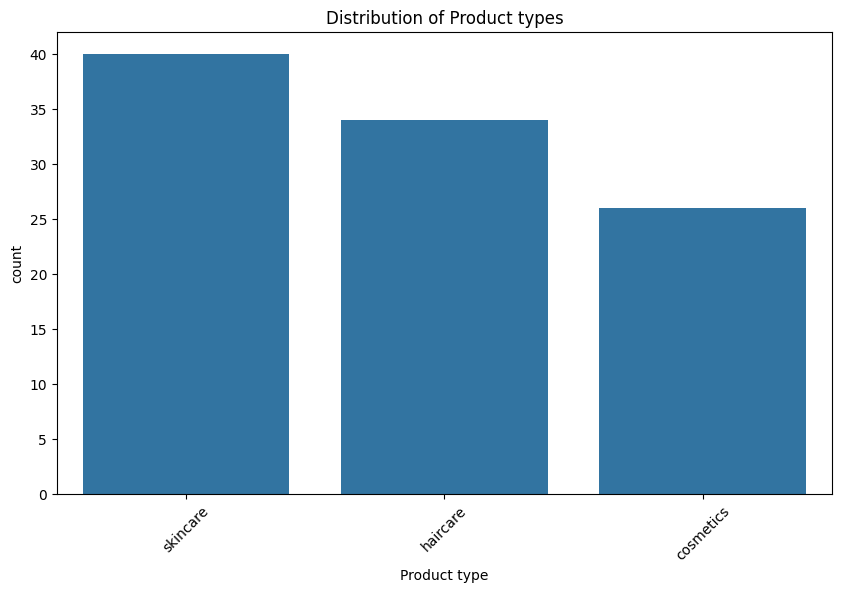

In [5]:
# Distribution of Product Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product type', order=df['Product type'].value_counts().index)
plt.title('Distribution of Product types')
plt.xticks(rotation=45)
plt.show()


## Inference:

A balanced distribution of product types(skincare, haircare and cosmetics) suggests a well-diversified product portfolio, catering to a wide range of customer needs.

## Distribution of Prices:

Analyzing the pricing structure helps in understanding the price range and identifying any potential outliers. This can inform pricing strategies, ensuring that products are competitively priced while maintaining profitability.

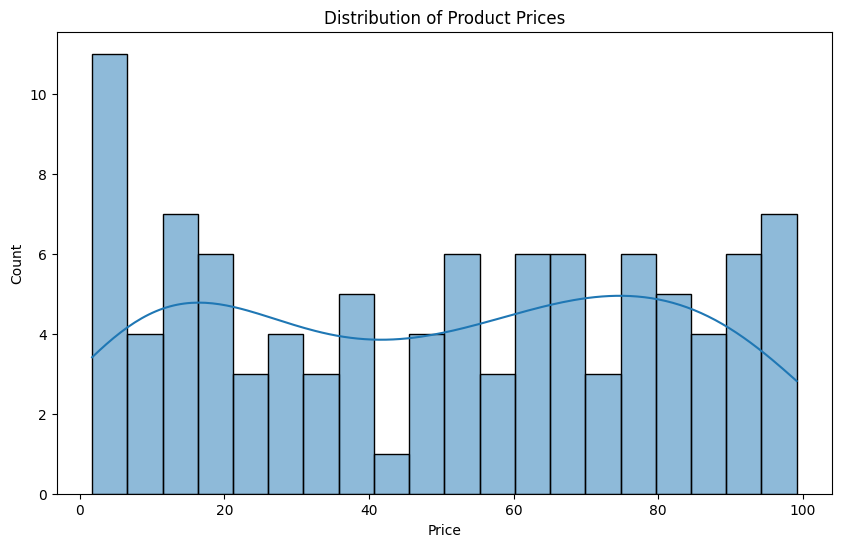

In [6]:

# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.show()


## Inference:

The pricing structure of the product portfolio is well-distributed, with most items being sold at the lower and upper-middle price ranges. This indicates a strategic positioning where the company is likely targeting both budget-conscious consumers and those willing to invest in higher-quality products without reaching the luxury segment.

## Implications:

1. Market Segmentation: The distribution suggests that the company is effectively catering to different segments of the market, which can help in capturing a broader customer base.

2. Revenue Optimization: By having a strong presence in both lower and upper-middle price ranges, the company can balance volume sales with higher-margin products, optimizing overall revenue.

3. Product Strategy: The focus on these price ranges might indicate that there is an opportunity to introduce premium or luxury products if the brand wants to expand its market reach and tap into higher-income customer segments.

## Availability of Products:

Product availability is a critical factor in ensuring that customer demand is met. By analyzing availability, we can identify any stockouts or overstock situations, helping in optimizing inventory levels.

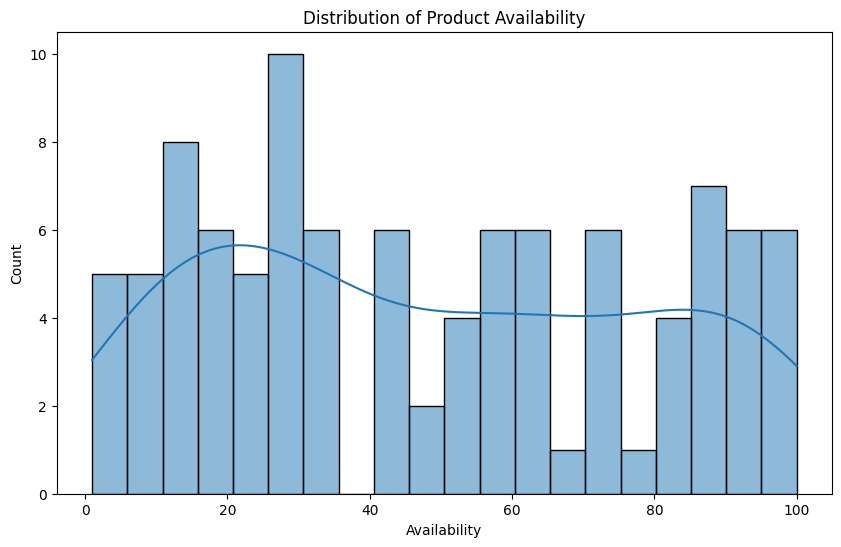

In [7]:
# Availability of Products
plt.figure(figsize=(10, 6))
sns.histplot(df['Availability'], bins=20, kde=True)
plt.title('Distribution of Product Availability')
plt.show()

## Several insights can be drawn from this distribution:

1. Varied Availability:

The product availability is spread across a wide range, indicating that the inventory levels for different products vary significantly. This could suggest that some products are well-stocked, while others may be at risk of stockouts.

2. Potential Stockout Risks:

There are multiple instances where availability is low (near 0-20%). These products might be frequently out of stock or in high demand, necessitating more efficient inventory management to prevent lost sales.

3. Overstocking Possibility:

Conversely, some products have high availability (above 80%), which might indicate overstocking. Overstocking can lead to increased holding costs and potential waste if the products have a shelf-life or become obsolete.

4. Inventory Management Opportunities:

The diverse distribution suggests opportunities for optimizing the supply chain. Products with lower availability might need more frequent reordering or better forecasting, while products with higher availability could benefit from demand-stimulating strategies or reduced order quantities to align supply with demand more effectively.

## Conclusion:

There is a need to balance the inventory levels to avoid stockouts and overstocking. Further analysis could involve identifying the demand patterns of these products and adjusting the supply chain strategy to ensure more consistent and optimal availability across all products.

## Distribution of Transportation Modes and Routes:
Transportation modes and routes play a significant role in logistics and cost management. Understanding which modes an routes are most commonly used can help in optimizing transportation strategies, reducing costs, and improving delivery times.

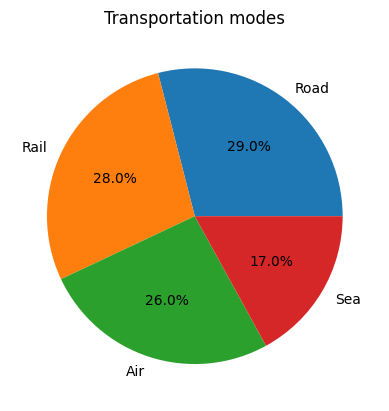

In [8]:
# Distribution of Transportation Modes
transportation_modes_labels=df['Transportation modes'].value_counts().index.to_list();

plt.pie(df['Transportation modes'].value_counts(), labels=transportation_modes_labels, autopct="%1.1f%%");
plt.title("Transportation modes");

## Inference:

The distribution suggests that while road transport is a key component of the supply chain, the company also leverages rail and air transport significantly. There might be opportunities to optimize costs further by evaluating the efficiency of each mode and considering the potential for increasing sea transport if lead times can be managed effectively. Additionally, this balanced distribution suggests the company is focused on maintaining flexibility and resilience in its logistics operations.

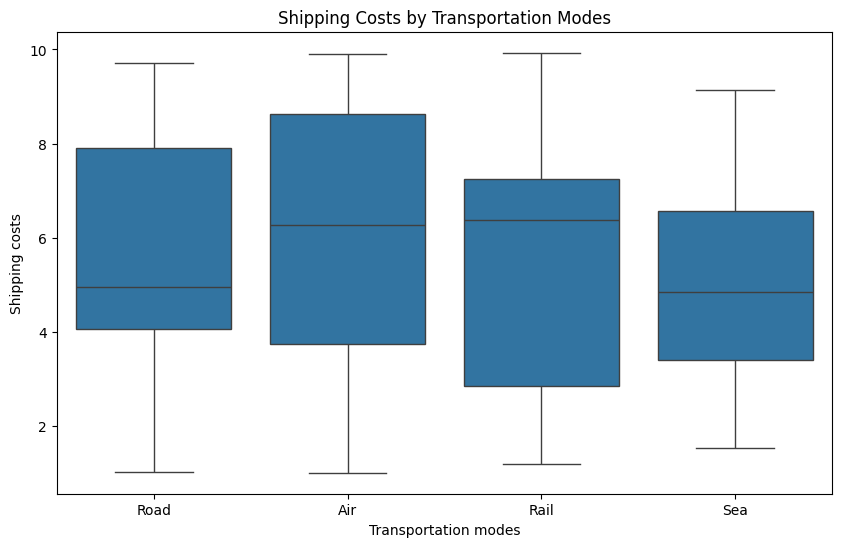

In [9]:
# Shipping Costs vs. Transportation Modes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transportation modes', y='Shipping costs')
plt.title('Shipping Costs by Transportation Modes')
plt.show()


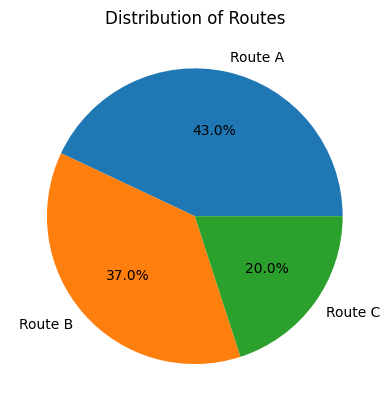

In [10]:
#Distribution of Routes
route_labels = df['Routes'].value_counts().index.to_list()

#Pie Chart
plt.pie(df['Routes'].value_counts(), labels=route_labels, autopct="%1.1f%%");
plt.title("Distribution of Routes");

## Inference

The distribution suggests that the company prioritizes Route A and Route B for the majority of its supply chain operations. This could be due to a combination of factors, including market demand, cost-effectiveness, and transportation efficiency. Route C, while less frequently used, may still play a vital role in niche areas or for specific product types. There may be opportunities to further analyze the performance of each route to optimize the overall supply chain strategy, possibly increasing the use of Route C if it can be made more competitive.

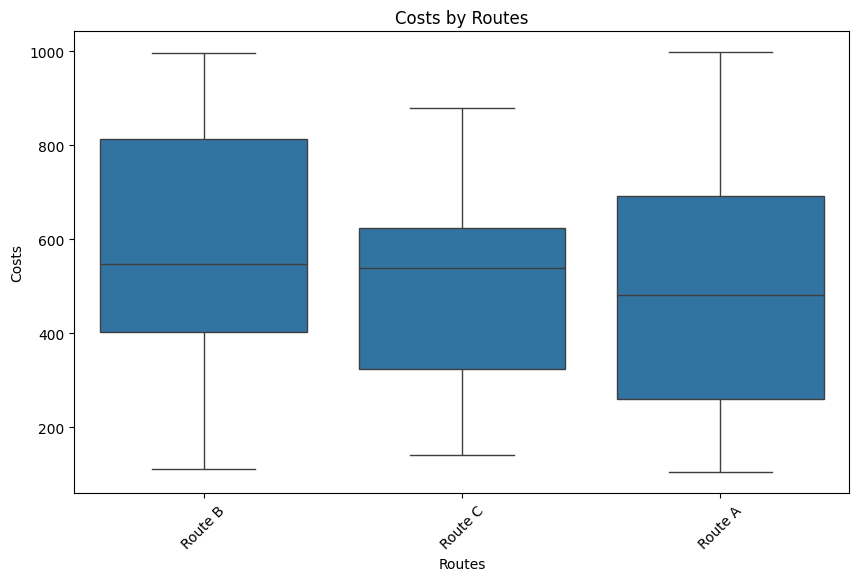

In [11]:

# Costs by Routes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Routes', y='Costs')
plt.title('Costs by Routes')
plt.xticks(rotation=45)
plt.show()

## Execute Product Purchases:

Calculating the optimal order quantity helps in maintaining the right balance between supply and demand. This reduces the risk of stockouts, which can lead to lost sales, and overstock, which ties up capital and increases storage costs.

In [12]:
# Optimization and Decision Support
# Execute Product Purchases
def calculate_optimal_order_quantity(demand, stock, vendor_capacity, min_order_qty):
    # Example logic: order quantity is demand minus current stock, considering vendor capacity and minimum order quantity
    order_quantity = max(demand - stock, min_order_qty)
    return min(order_quantity, vendor_capacity)

# Example usage
for index, row in df.iterrows():
    optimal_quantity = calculate_optimal_order_quantity(
        demand=row["Number of products sold"],
        stock=row["Stock levels"],
        vendor_capacity=row["Order quantities"],
        min_order_qty=500  # Example minimum order quantity
    )
    print(f"Optimal Order Quantity for {row['Product type']} (SKU: {row['SKU']}): {optimal_quantity}")


Optimal Order Quantity for haircare (SKU: SKU0): 96
Optimal Order Quantity for skincare (SKU: SKU1): 37
Optimal Order Quantity for haircare (SKU: SKU2): 88
Optimal Order Quantity for skincare (SKU: SKU3): 59
Optimal Order Quantity for skincare (SKU: SKU4): 56
Optimal Order Quantity for haircare (SKU: SKU5): 66
Optimal Order Quantity for skincare (SKU: SKU6): 58
Optimal Order Quantity for cosmetics (SKU: SKU7): 11
Optimal Order Quantity for cosmetics (SKU: SKU8): 15
Optimal Order Quantity for skincare (SKU: SKU9): 83
Optimal Order Quantity for skincare (SKU: SKU10): 80
Optimal Order Quantity for skincare (SKU: SKU11): 60
Optimal Order Quantity for haircare (SKU: SKU12): 85
Optimal Order Quantity for skincare (SKU: SKU13): 48
Optimal Order Quantity for skincare (SKU: SKU14): 78
Optimal Order Quantity for skincare (SKU: SKU15): 69
Optimal Order Quantity for skincare (SKU: SKU16): 78
Optimal Order Quantity for cosmetics (SKU: SKU17): 85
Optimal Order Quantity for haircare (SKU: SKU18): 46


## Conclusion:

Efficiency and Cost Reduction: The optimization of order quantities based on demand, stock levels, vendor capacity, and minimum order requirements enhances supply chain efficiency. This approach not only ensures that inventory levels are optimal but also reduces costs associated with overstocking, understocking, and inefficient ordering practices. Ultimately, this leads to a more responsive and cost-effective supply chain, capable of meeting customer demand while minimizing waste and excess inventory.

## Issue Purchase Requisitions:

Automating the process of issuing purchase requisitions ensures that orders are placed timely, reducing manual errors and ensuring a consistent flow of products through the supply chain.

In [13]:
# Issue Purchase Requisitions
df['Purchase Order Issued'] = df.apply(lambda row: 'Yes' if row['Order quantities'] > 0 else 'No', axis=1)


In [14]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Purchase Order Issued
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,Yes
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,Yes
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,Yes
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,Yes
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,Yes


## Monitor Supply Timing and Gaps:

Identifying supply gaps is crucial for maintaining a responsive supply chain. By comparing lead times with manufacturing lead times, we can spot potential delays and take corrective actions to ensure that products are available when needed.

In [15]:
# Monitor Supply Timing and Gaps
df['Supply Gap'] = df['Lead times'] - df['Manufacturing lead time']
df['Supply Gap'].describe()


,Supply Gap
count,100.000000
mean,1.190000
std,12.493792
min,-27.000000
25%,-7.000000
50%,1.000000
75%,9.250000
max,27.000000


##Inference:


1. Wide Variation in Supply Gap:

The standard deviation of 12.49 indicates a significant variation in the supply gap, suggesting that there are considerable inconsistencies in how well supply meets demand across different products or periods. This variation might be due to fluctuating demand, supplier reliability issues, or internal production challenges.

2. Balanced Mean:

The mean supply gap is 1.19, which is close to zero. This suggests that, on average, the supply chain is fairly well-balanced with a slight tendency towards a positive gap, indicating that supply is slightly ahead of demand. This could be beneficial in preventing stockouts, but it may also imply a risk of overproduction or excess inventory.

3. Negative and Positive Extremes:

The minimum value of -27 and maximum value of 27 demonstrate that there are extremes on both ends of the supply gap spectrum. A negative gap (e.g., -27) indicates that in some cases, production is lagging significantly behind demand, which can lead to stockouts and lost sales. Conversely, a positive gap (e.g., 27) indicates excess supply relative to demand, which could result in overstock and increased holding costs.

4. Quartile Analysis:

The 25th percentile at -7 suggests that at least 25% of the data shows a negative supply gap, where production is lagging behind demand. This might be a cause for concern and requires attention to prevent potential sales loss.
The 75th percentile at 9.25 indicates that the top 25% of the data shows a positive supply gap, where production is outpacing demand. While this ensures availability, it may also lead to inefficiencies such as increased inventory costs or wastage.

## Conclusion:

Opportunity for Optimization: The wide range and significant standard deviation highlight the need for better alignment between production and demand planning. By addressing the causes of both negative and positive supply gaps, the company can improve supply chain efficiency, reduce costs, and better meet customer demand. Strategies such as demand forecasting, flexible manufacturing processes, and improved supplier relationships could help in narrowing the supply gap and achieving a more consistent and reliable supply chain performance.

In [16]:
# Products with high defect rates
high_defect_products = df[df['Defect rates'] > 0.03]
print("Products with High Defect Rates:")
print(high_defect_products[['Product type', 'SKU', 'Defect rates']])

Products with High Defect Rates:
   Product type    SKU  Defect rates
0      haircare   SKU0      0.226410
1      skincare   SKU1      4.854068
2      haircare   SKU2      4.580593
3      skincare   SKU3      4.746649
4      skincare   SKU4      3.145580
..          ...    ...           ...
95     haircare  SKU95      1.210882
96    cosmetics  SKU96      3.872048
97     haircare  SKU97      3.376238
98     skincare  SKU98      2.908122
99     haircare  SKU99      0.346027

[98 rows x 3 columns]


## conclusion:

This information can help prioritize quality improvement efforts and focus on specific product types or SKUs with the highest defect rates. While working on improving supply chain or product quality, addressing these high-defect products could be a crucial step.